<a href="https://colab.research.google.com/github/BrownTian/Keras_tensorflow/blob/master/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
!pwd

/content


In [4]:
tf.__version__

'1.12.0'

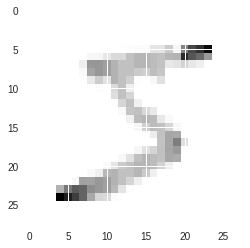

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()


x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [6]:
x_train.shape

(60000, 28, 28)

In [24]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=3)


Epoch 1/3
60000/60000 [==============================] - 10s 164us/step - loss: 0.2657 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 10s 161us/step - loss: 0.1062 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 10s 162us/step - loss: 0.0724 - acc: 0.9766


In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
val_loss, val_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 75us/step


In [27]:
val_loss

0.09036509627988562

In [28]:
val_acc

0.9712

In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions=new_model.predict([x_test])

In [32]:
#distribution
print(predictions)

[[7.4862117e-11 1.1066723e-08 9.6389999e-07 ... 9.9999559e-01
  1.3712648e-09 1.2848052e-09]
 [3.1457728e-07 1.9248265e-03 9.9790061e-01 ... 2.9691336e-08
  2.0215986e-05 2.3617504e-09]
 [2.6988286e-07 9.9952209e-01 4.5115183e-05 ... 2.2480624e-04
  1.3346832e-04 9.6605054e-06]
 ...
 [3.4188481e-09 6.2133347e-07 9.6288680e-08 ... 2.6003266e-04
  4.4475673e-06 6.4883920e-05]
 [2.2644369e-06 8.5367560e-08 5.3961134e-08 ... 1.0808284e-06
  8.2432659e-04 1.4729829e-08]
 [8.0289220e-07 3.3124408e-08 5.8088258e-06 ... 1.0478086e-09
  8.5781238e-07 5.7177648e-08]]


In [35]:
np.argmax(predictions,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

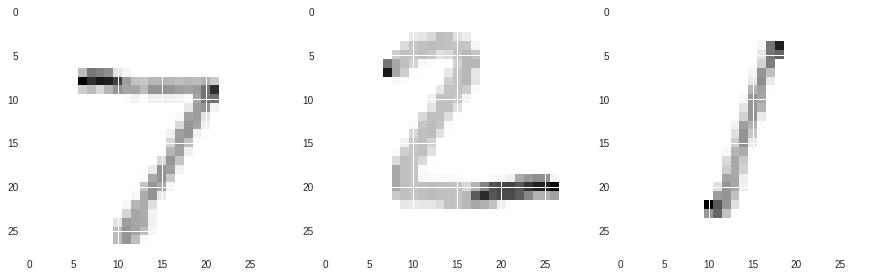

In [44]:
fig = plt.figure(figsize = (15,8))

for i in range(3):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(x_test[i])